In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('D:\codes_programming\py files\Datasets\\diabetes.CSV')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,neg
764,2,122,70,27,0,36.8,0.340,27,neg
765,5,121,72,23,112,26.2,0.245,30,neg
766,1,126,60,0,0,30.1,0.349,47,pos


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [7]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Diabetes                    False
dtype: bool

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
df['Diabetes']=le.fit_transform(df['Diabetes'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
x = df.iloc[:,:8].values
y = df.iloc[:,8:].values

In [12]:
y.shape

(768, 1)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
#standard scaling because classification
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
#to all inputs
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [25]:
x_test

array([[-0.89295432,  2.39507259,  0.39763774, ...,  1.52657475,
         2.78935129, -0.93064283],
       [-0.56553774, -0.42589245,  0.2898275 , ...,  0.31944116,
        -0.27698825, -0.83598035],
       [ 0.08929543, -1.37643502, -0.35703388, ...,  0.37136088,
        -0.31725331, -0.64665539],
       ...,
       [ 0.08929543,  0.64730077,  0.93668889, ...,  1.66935399,
         0.4694641 , -0.93064283],
       [-0.23812115, -0.14992848,  0.2898275 , ..., -0.62809381,
        -1.19689011, -0.74131787],
       [-0.89295432, -0.42589245,  0.18201727, ..., -0.04399691,
         1.01459113, -0.74131787]])

In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

d:\python\python386\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [28]:
y_pred = nb.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7662337662337663

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[87, 20],
       [16, 31]], dtype=int64)

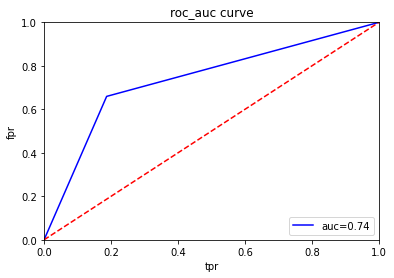

In [31]:
import sklearn.metrics as metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title("roc_auc curve")
plt.plot(fpr,tpr,'b',label='auc=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.legend(loc='lower right')

## SVM

In [32]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)

d:\python\python386\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [33]:
y_pred = svm.predict(x_test)

In [34]:
accuracy_score(y_test,y_pred)

0.8116883116883117

In [35]:
confusion_matrix(y_test,y_pred)

array([[96, 11],
       [18, 29]], dtype=int64)

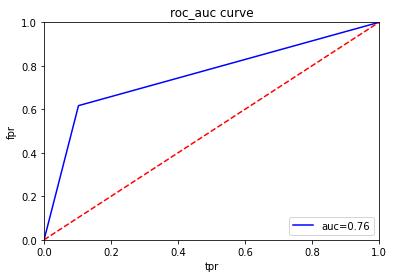

In [36]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
plt.title("roc_auc curve")
plt.plot(fpr,tpr,'b',label='auc=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.legend(loc='lower right')